<a href="https://colab.research.google.com/github/lhteillet/NLP_TD2_NOTE/blob/main/StructuredPrediction_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore structured prediction tasks and compare different prediction methods

**Authors: maria.boritchev@telecom-paris.fr and matthieu.labeau@telecom-paris.fr**

## Objectives:

- Explore Part-of-Speech (POS) tagging, in particular through tools integrated to the ```nltk``` library.

- Use the notion of _chunking_ and its different implementations and explore sentence structure.

- Implement a BIO tagging for POS and compare our implementation with tools integrated to the ```nltk``` library.

- Explore Named Entity Recognition (NER) with tools integrated to the ```nltk``` library and ```spaCy``` visualisations.

- Compare these tools with a neural network implementation using BERT.

- Throughout this lab, we will use several datasets: ```nlp-getting-started```, ```entity-annotated-corpus```, and ```wikibooks-dataset```. These datasets need to be downloaded from the course page.

In [34]:
# The main packages needed for this lab:
import numpy as np
import pandas as pd
import nltk
import os
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In this lab, we will first use the functions ```word_tokenize``` and ```pos_tag``` for the POS tagging task.

### Obtaining and exploring the data
We start from the beginning with the ```nlp-getting-started``` dataset.

In [35]:
# Read data from nlp-getting-started:
nlp_start_df = pd.read_csv('nlp-getting-started/train.csv')

Explore the data directories and get familiar with their contents and type: how is the data organised?

<span style="color:red">Questions:</span> What type of natural language data are we working with (sentences, words)? What are the sources and languages of the data?

In [36]:
# Examine example sentences:
nlp_start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [37]:
nlp_start_df[nlp_start_df["target"]==0].head(5)

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0


In [38]:
nlp_start_df[nlp_start_df["target"]==1].head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**What type of natural language data are we working with (sentences, words)?**

We are workings with sentences (set of words)

** What are the sources and languages of the data?**
The data are sentences in english,


<span style="color:green">To code:</span> Using the functions ```word_tokenize``` and ```pos_tag``` of ```nltk```, tokenize an example sentence and apply POS tagging to it.

In [50]:
from nltk import word_tokenize, pos_tag
# Tokenize a sentence and apply POS tagging:
sentence = nlp_start_df.iloc[100]["text"]
tokens = word_tokenize(sentence)
# Apply POS tagging
pos_tags = pos_tag(tokens)
print(pos_tags)

[('.', '.'), ('@', 'CC'), ('NorwayMFA', 'NNP'), ('#', '#'), ('Bahrain', 'NNP'), ('police', 'NNS'), ('had', 'VBD'), ('previously', 'RB'), ('died', 'VBN'), ('in', 'IN'), ('a', 'DT'), ('road', 'NN'), ('accident', 'NN'), ('they', 'PRP'), ('were', 'VBD'), ('not', 'RB'), ('killed', 'VBN'), ('by', 'IN'), ('explosion', 'NN'), ('https', 'NN'), (':', ':'), ('//t.co/gFJfgTodad', 'NN')]


<span style="color:red">Question:</span> What is the set of POS-tags used by the ```pos_tag``` function?

In [51]:
print("The set of POS-tags used by the pos_tag function on our sentence is :")
print(set([ptag[1] for ptag in pos_tags]))

The set of POS-tags used by the pos_tag function on our sentence is :
{'.', 'CC', 'IN', 'PRP', 'NNS', 'NN', ':', 'VBN', 'RB', '#', 'NNP', 'DT', 'VBD'}


As we discussed during the lecture, there can be different sets of POS-tags. The following shows you the documentation for the ```UPENN``` tagset.

In [52]:
nltk.download('tagsets')

nltk.help.upenn_tagset('NN')
nltk.help.upenn_tagset('IN')
nltk.help.upenn_tagset('DT')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


<span style="color:green">To code:</span>  Produce a different POS tagging of the same sentence using a different set of POS-tags of your choice.

In [53]:
# Tokenize the sentence and apply a different set of POS-tags of your choice:
nltk.download('universal_tagset')

pos_tags_bis = pos_tag(tokens,tagset="universal")
print(pos_tags_bis)


[('.', '.'), ('@', 'CONJ'), ('NorwayMFA', 'NOUN'), ('#', '.'), ('Bahrain', 'NOUN'), ('police', 'NOUN'), ('had', 'VERB'), ('previously', 'ADV'), ('died', 'VERB'), ('in', 'ADP'), ('a', 'DET'), ('road', 'NOUN'), ('accident', 'NOUN'), ('they', 'PRON'), ('were', 'VERB'), ('not', 'ADV'), ('killed', 'VERB'), ('by', 'ADP'), ('explosion', 'NOUN'), ('https', 'NOUN'), (':', '.'), ('//t.co/gFJfgTodad', 'NOUN')]


[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


### Chunking
_Chunking_  is a process of grouping small pieces of information into large units. The primary use of chunking in the context of POS-tagging is in building sub-syntactic trees, using POS-tags-based grammars, implemented using _regular expressions_. The resulting subsentences are called _chunks_. For example, we can use chunking to subdivide a sentence in groups of _noun phrases_ (NPs). There are no pre-defined rules or grammars for chunking, these need to be implemented using regular expressions depending on our need. For example, if we want to chunk **only** ```NN``` tags, we need to use the pattern ````mychunk:{<NN>}````. Conversly, if we want to chunk **all types of tags** which start with 'NN', we'll use `mychunk:{<NN.*>}`.

<span style="color:green">To code:</span>  Apply the chunking method to a sentence from the ```nlp-getting-started``` dataset.

In [46]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.0 MB/s eta 0:00:00


After Chunking:
 (S
  All/DT
  residents/NNS
  asked/VBD
  to/TO
  'shelter/VB
  in/IN
  (mychunk place/NN)
  '/''
  are/VBP
  being/VBG
  notified/VBN
  by/IN
  officers/NNS
  ./.
  No/DT
  other/JJ
  (mychunk evacuation/NN)
  or/CC
  (mychunk shelter/NN)
  in/IN
  (mychunk place/NN)
  orders/NNS
  are/VBP
  expected/VBN)


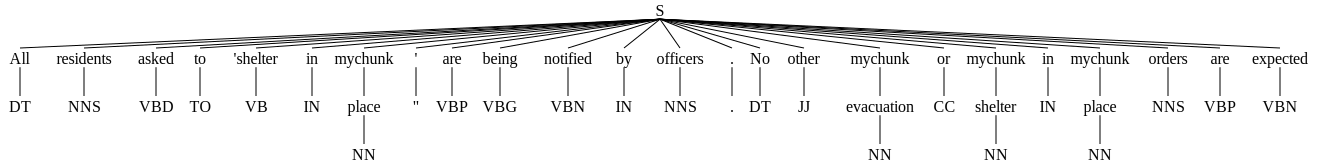

In [63]:
from nltk import RegexpParser
from nltk.draw.tree import TreeView
from IPython.display import Image
import svgling

# Chunk all nouns from 'sentence' sentence
sentence = nlp_start_df.iloc[2]["text"]
tokens = word_tokenize(sentence)
sentence = pos_tag(tokens)
patterns= """mychunk:{<NN>+}"""
chunker = RegexpParser(patterns)
output = chunker.parse(sentence)
print("After Chunking:\n",output)
svgling.draw_tree(output)

<span style="color:green">To code:</span>  Produce a chunking of the same sentence retrieving all the adjacence nouns (noun-based tags).

After Chunking:
 (S
  Anyone/NNP
  need/VBP
  a/DT
  (mychunk P/U/NNP tonight/NN)
  ?/.
  I/PRP
  play/VBP
  Hybrid/JJ
  (mychunk Slayer/NNP ps4/NN EU/NNP)
  ./.
  (mychunk
    HMU/NNP
    @/NNP
    Cod8sandscrims/NNP
    @/NNP
    EmpirikGaming/NNP
    @/NNP
    CoDAWScrims/NNP
    @/NNP)
  4TP_KOTC/CD
  @/VBD
  4TPFA/CD
  (mychunk @/NNS afterShock_Org/NN))


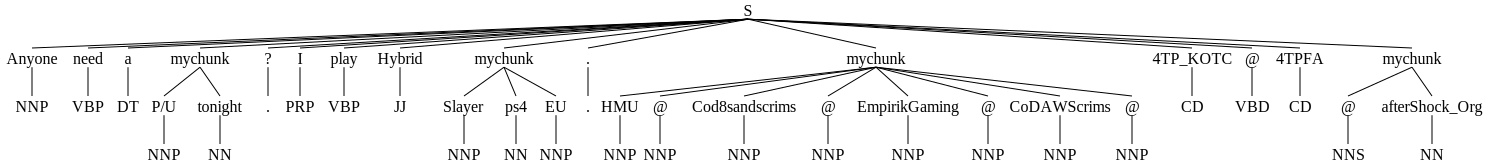

In [87]:
# Chunk all adjacence nouns from 'sentence' sentence
sentence = nlp_start_df.iloc[135]["text"]
tokens = word_tokenize(sentence)
sentence = pos_tag(tokens)
patterns= """mychunk:{<NN.*><NN.*>+}"""
chunker = RegexpParser(patterns)
output = chunker.parse(sentence)
print("After Chunking:\n",output)
svgling.draw_tree(output)

Chunking can also be done using BIO algorithm: ```B```eginning of a chunk, ```I```inside of a chunk, ```O```utside of a chunk.

In [111]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint # To display the list nicely

iob_tagged = tree2conlltags(output)
iob_tagged

[('Anyone', 'NNP', 'O'),
 ('need', 'VBP', 'O'),
 ('a', 'DT', 'O'),
 ('P/U', 'NNP', 'B-mychunk'),
 ('tonight', 'NN', 'I-mychunk'),
 ('?', '.', 'O'),
 ('I', 'PRP', 'O'),
 ('play', 'VBP', 'O'),
 ('Hybrid', 'JJ', 'O'),
 ('Slayer', 'NNP', 'B-mychunk'),
 ('ps4', 'NN', 'I-mychunk'),
 ('EU', 'NNP', 'I-mychunk'),
 ('.', '.', 'O'),
 ('HMU', 'NNP', 'B-mychunk'),
 ('@', 'NNP', 'I-mychunk'),
 ('Cod8sandscrims', 'NNP', 'I-mychunk'),
 ('@', 'NNP', 'I-mychunk'),
 ('EmpirikGaming', 'NNP', 'I-mychunk'),
 ('@', 'NNP', 'I-mychunk'),
 ('CoDAWScrims', 'NNP', 'I-mychunk'),
 ('@', 'NNP', 'I-mychunk'),
 ('4TP_KOTC', 'CD', 'O'),
 ('@', 'VBD', 'O'),
 ('4TPFA', 'CD', 'O'),
 ('@', 'NNS', 'B-mychunk'),
 ('afterShock_Org', 'NN', 'I-mychunk')]

<span style="color:green">To code:</span> Implement a tree-crawling retrieving the list of triples ```('word','POS-tag','BIO-tag')``` from ```chunker.parse``` output trees.

In [210]:
# Tree crawler retrieval of triples from chunker.parser output trees
# Function to retrieve triples ('word', 'POS-tag', 'BIO-tag') from the tree
def extract_triples(tree):
    triples = []
    for subtree in tree:
      current_triple = []
      if isinstance(subtree,tuple):
        current_triple.append(subtree[0])
        current_triple.append(subtree[1])
        current_triple.append('0')
        triples.append(tuple(current_triple))
      else:
        c = 0 # Use to determine the begining and end of a chunck
        for subsubtree in subtree:
          current_triple = []
          if isinstance(subsubtree,tuple):
            current_triple.append(subsubtree[0])
            current_triple.append(subsubtree[1])
            if c==0:
              current_triple.append('B-mychunk')
            else:
              current_triple.append('I-mychunk')
            c += 1
          triples.append(tuple(current_triple))
    return triples


def extract_triples(tree):
    triples = []
    for subtree in tree:
      current_triple = []
      if isinstance(subtree,tuple):
        current_triple.append(subtree[0])
        current_triple.append(subtree[1])
        current_triple.append('0')
        triples.append(tuple(current_triple))
      else:
        c = 0 # Use to determine the begining and end of a chunck
        for subsubtree in subtree:
          current_triple = []
          if isinstance(subsubtree,tuple):
            current_triple.append(subsubtree[0])
            current_triple.append(subsubtree[1])
            if c==0:
              current_triple.append('B-mychunk')
            else:
              current_triple.append('I-mychunk')
            c += 1
          triples.append(tuple(current_triple))
    return triples



# Extract triples from the tree
result_triples = extract_triples_recursive(output)

# Print the result
pprint(result_triples)

[('Anyone', 'NNP', 'O'),
 ('need', 'VBP', 'B-B-mychunk'),
 ('a', 'DT', 'B-I-B-mychunk'),
 ('P/U', 'NNP', 'B-I-I-B-mychunk'),
 ('tonight', 'NN', 'B-I-I-I-B-mychunk'),
 ('?', '.', 'B-I-I-B-mychunk'),
 ('I', 'PRP', 'B-I-I-I-B-mychunk'),
 ('play', 'VBP', 'B-I-I-I-I-B-mychunk'),
 ('Hybrid', 'JJ', 'B-I-I-I-I-I-B-mychunk'),
 ('Slayer', 'NNP', 'B-I-I-I-I-I-I-B-mychunk'),
 ('ps4', 'NN', 'B-I-I-I-I-I-I-I-B-mychunk'),
 ('EU', 'NNP', 'B-I-I-I-I-I-I-I-I-B-mychunk'),
 ('.', '.', 'B-I-I-I-I-I-I-B-mychunk'),
 ('HMU', 'NNP', 'B-I-I-I-I-I-I-I-B-mychunk'),
 ('@', 'NNP', 'B-I-I-I-I-I-I-I-I-B-mychunk'),
 ('Cod8sandscrims', 'NNP', 'B-I-I-I-I-I-I-I-I-I-B-mychunk'),
 ('@', 'NNP', 'B-I-I-I-I-I-I-I-I-I-I-B-mychunk'),
 ('EmpirikGaming', 'NNP', 'B-I-I-I-I-I-I-I-I-I-I-I-B-mychunk'),
 ('@', 'NNP', 'B-I-I-I-I-I-I-I-I-I-I-I-I-B-mychunk'),
 ('CoDAWScrims', 'NNP', 'B-I-I-I-I-I-I-I-I-I-I-I-I-I-B-mychunk'),
 ('@', 'NNP', 'B-I-I-I-I-I-I-I-I-I-I-I-I-I-I-B-mychunk'),
 ('4TP_KOTC', 'CD', 'B-I-I-I-I-I-I-I-B-mychunk'),
 ('@', 

# Named Entity Recognition (NER)

NER is also implemented in ```nltk```, using chunking: the ```ne_chunk()``` method in the ```nltk.chunk``` module.

<span style="color:green">To code:</span>  Implement NER on the same sentence with the method showcased below.

In [157]:
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
from nltk.chunk import ne_chunk

def extract_ne(trees, labels):

    ne_list = []
    for tree in ne_res:
        if hasattr(tree, 'label'):
            if tree.label() in labels:
                ne_list.append(tree)

    return ne_list

# NER on 'sentence' sentence
sentence = nlp_start_df.iloc[135]["text"]
ne_res = ne_chunk(pos_tag(word_tokenize(sentence)))
labels = ['ORGANIZATION']

print(extract_ne(ne_res, labels))

[Tree('ORGANIZATION', [('HMU', 'NNP')]), Tree('ORGANIZATION', [('afterShock_Org', 'NN')])]


<span style="color:red">Questions:</span> What other labels are available?

<span style="color:green">To code:</span> Implement a NE extraction using two or more different labels.

In [ ]:
# NER using two or more different labels

## NER and ```spaCy```

```spaCy``` module also contains a statistical NER system. It is trained to identify named and numeric entities, such as companies, locations, organizations and products. First, we need more complex data.

In [ ]:
import sqlite3

cnx = sqlite3.connect('wikibooks.sqlite')
df_wikibooks = pd.read_sql_query("SELECT * FROM en", cnx)
df_wikibooks.head()

The following displays ```spaCy```'s NER on a given document from the ```wikibooks``` dataset.

In [ ]:
import spacy
#spacy.cli.download('en_core_web_sm')
nlp = spacy.load("en_core_web_sm")
wiki_ex = df_wikibooks.iloc[11]['body_text']
# print(wiki_ex)
doc = nlp(wiki_ex)
doc

In [ ]:
print('All entity types that spacy recognised from the document above')
set([ent.label_ for ent in doc.ents])

<span style="color:red">Questions:</span> What other labels are available?

<span style="color:green">To code:</span> Print out all persons and organizations recognised in the document.

In [ ]:
# Print out all persons and organisations from the document above


```spaCy``` also features a very nice visualization tool for NE. The following showcases this tool on a Wikibooks page.

In [ ]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

<span style="color:red">Questions:</span> Can you see problems in this annotation? What adaptations would you suggest?

### Comparing accuracies with a pre-trained model

We will now use a pre-trained BERT-based model from the ```transformers``` library. Assuming we use the model as is, and do not do any fine-tuning, we can use the high-level interface from the library, ```pipeline```.
First, let's look at the model and the tags it uses.

In [163]:
from transformers import AutoModelForTokenClassification, AutoTokenizer, pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
print('Entities from the pretrained model')
print(model.config.id2label)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Entities from the pretrained model
{0: 'O', 1: 'B-MISC', 2: 'I-MISC', 3: 'B-PER', 4: 'I-PER', 5: 'B-ORG', 6: 'I-ORG', 7: 'B-LOC', 8: 'I-LOC'}


Now, let's look at one last dataset. It contains **reference tags** for every word in the sentences. However, the tagset is not exactly the same - we will need to use a mapping. For simplicity, we will only look at the *Location* tags in what follows !

In [161]:
# Let's re-format the dataset for convenience
df = pd.read_csv('./entity-annotated-corpus/ner_dataset.csv', encoding='unicode_escape')
df['Sentence #'] = df['Sentence #'].ffill()
# Grouping sentences together into one sentence by row, for words, pos, tags
df_gr = df.groupby('Sentence #').agg(lambda x: list(x))
# Just renaming indexes
df_gr.index  = [int(s[9:]) for s in df_gr.index]

In [168]:
df_gr.iloc[0]["Word"]

['Thousands',
 'of',
 'demonstrators',
 'have',
 'marched',
 'through',
 'London',
 'to',
 'protest',
 'the',
 'war',
 'in',
 'Iraq',
 'and',
 'demand',
 'the',
 'withdrawal',
 'of',
 'British',
 'troops',
 'from',
 'that',
 'country',
 '.']

In [170]:
df_gr

,Word,POS,Tag
1,"[Thousands, of, demonstrators, have, marched, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo..."
10,"[Iranian, officials, say, they, expect, to, ge...","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, JJ, J...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
100,"[Helicopter, gunships, Saturday, pounded, mili...","[NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O..."
1000,"[They, left, after, a, tense, hour-long, stand...","[PRP, VBD, IN, DT, NN, JJ, NN, IN, NN, NNS, .]","[O, O, O, O, O, O, O, O, O, O, O]"
10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo..."
...,...,...,...
9995,"[Opposition, leader, Mir, Hossein, Mousavi, ha...","[NNP, NN, NNP, NNP, NNP, VBZ, VBN, PRP, VBZ, T...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O..."
9996,"[On, Thursday, ,, Iranian, state, media, publi...","[IN, NNP, ,, JJ, NN, NNS, VBN, DT, NN, IN, DT,...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B..."
9997,"[Following, Iran, 's, disputed, June, 12, elec...","[VBG, NNP, POS, JJ, NNP, CD, NNS, ,, NNS, NNS,...","[O, B-geo, O, O, B-tim, I-tim, O, O, O, O, O, ..."
9998,"[Since, then, ,, authorities, have, held, publ...","[IN, RB, ,, NNS, VBP, VBN, JJ, NNS, IN, DT, VB...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [162]:
# What's the tagset ?
tags = []
for tag in df_gr['Tag'].to_list():
    tags.extend(tag)
print('Entities in our data set')
print(set(tags))

Entities in our data set
{'I-nat', 'I-art', 'I-geo', 'B-gpe', 'O', 'I-tim', 'I-gpe', 'I-eve', 'B-tim', 'B-geo', 'B-org', 'B-per', 'I-per', 'I-org', 'B-eve', 'B-nat', 'B-art'}


<span style="color:red">Questions:</span> What is the tagset used in the previous cell?

In [175]:
# Let's look at an example !
example = df_gr.loc[1]['Word']
example_tag = df_gr.loc[1]['Tag']
NER_model = pipeline("ner",
                     model="dslim/bert-base-NER",
                     grouped_entities=False)
print("Output from the pipeline containing the BERT-based model:")
print(NER_model(example))
print("Reference tag list")
print(example_tag)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="none"` instead.
  warnings.warn(


Output from the pipeline containing the BERT-based model:
[[], [], [], [], [], [], [{'entity': 'B-LOC', 'score': 0.9994006, 'index': 1, 'word': 'London', 'start': 0, 'end': 6}], [], [], [], [], [], [{'entity': 'B-LOC', 'score': 0.99984574, 'index': 1, 'word': 'Iraq', 'start': 0, 'end': 4}], [], [], [], [], [], [{'entity': 'B-MISC', 'score': 0.9996024, 'index': 1, 'word': 'British', 'start': 0, 'end': 7}], [], [], [], [], []]
Reference tag list
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


<span style="color:green">To code:</span> Assuming the following mapping between the tags from the dataset and those output by the BERT model:
```python
entity_mapping = {
'O': 'O',
'B-per': 'B-PER',
'I-per': 'I-PER',
'B-org': 'B-ORG',
'I-org': 'I-ORG',
'B-geo': 'B-LOC',
'I-geo': 'I-LOC',
'B-art': 'B-MISC', 'B-eve': 'B-MISC', 'B-gpe': 'B-MISC', 'B-nat': 'B-MISC', 'B-tim': 'B-MISC',
'I-art': 'I-MISC', 'I-eve': 'I-MISC', 'I-gpe': 'I-MISC', 'I-nat': 'I-MISC', 'I-tim': 'I-MISC',
}
```

Assuming you can use the less precise tagset (from the BERT model),
Find a way to compute the accuracy of the BERT-based model on all **complete locations** on the dataset. Compare with the same value obtained for the NLTK model !

In [206]:
def accuracy_BERT(dataset,userMapping,howMany=10):
  NER_model = pipeline("ner",
                     model="dslim/bert-base-NER",
                     grouped_entities=False)
  acc = 0
  n_tot = 0
  for k_sentence in range(len(dataset[:20])):
      true_label = dataset.iloc[k_sentence]["Tag"]
      prediction = NER_model(dataset.iloc[k_sentence]["Word"])
      for k in range(len(true_label)):
        if "geo" in true_label[k]:
          print(true_label[k],prediction[k])
          if (prediction[k]==[]) and (true_label[k]=='O'):
            acc +=1
          elif prediction[k][0]["entity"] == userMapping[true_label[k]]:
            acc +=1
          n_tot += 1
  return acc/n_tot

entity_mapping = {
'O': 'O',
'B-per': 'B-PER',
'I-per': 'I-PER',
'B-org': 'B-ORG',
'I-org': 'I-ORG',
'B-geo': 'B-LOC',
'I-geo': 'I-LOC',
'B-art': 'B-MISC', 'B-eve': 'B-MISC', 'B-gpe': 'B-MISC', 'B-nat': 'B-MISC', 'B-tim': 'B-MISC',
'I-art': 'I-MISC', 'I-eve': 'I-MISC', 'I-gpe': 'I-MISC', 'I-nat': 'I-MISC', 'I-tim': 'I-MISC',
}

accuracy_BERT(df_gr,entity_mapping,20)


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="none"` instead.
  warnings.warn(


B-geo [{'entity': 'B-LOC', 'score': 0.9994006, 'index': 1, 'word': 'London', 'start': 0, 'end': 6}]
B-geo [{'entity': 'B-LOC', 'score': 0.99984574, 'index': 1, 'word': 'Iraq', 'start': 0, 'end': 4}]
B-geo [{'entity': 'B-LOC', 'score': 0.98372513, 'index': 1, 'word': 'Or', 'start': 0, 'end': 2}, {'entity': 'I-LOC', 'score': 0.89950264, 'index': 2, 'word': '##ak', 'start': 2, 'end': 4}, {'entity': 'I-LOC', 'score': 0.9201414, 'index': 3, 'word': '##zai', 'start': 4, 'end': 7}]
B-geo [{'entity': 'B-LOC', 'score': 0.99938977, 'index': 1, 'word': 'South', 'start': 0, 'end': 5}]
I-geo [{'entity': 'B-PER', 'score': 0.9994179, 'index': 1, 'word': 'W', 'start': 0, 'end': 1}, {'entity': 'I-PER', 'score': 0.932174, 'index': 2, 'word': '##azi', 'start': 1, 'end': 4}, {'entity': 'I-PER', 'score': 0.90741783, 'index': 3, 'word': '##rist', 'start': 4, 'end': 8}, {'entity': 'B-PER', 'score': 0.5507458, 'index': 4, 'word': '##an', 'start': 8, 'end': 10}]
B-geo [{'entity': 'B-ORG', 'score': 0.9956885, '

IndexError: ignored